In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ser Bachiller

In [2]:
ser_bach = pd.read_csv('../DATOS/base_ser_bachiller.csv',delimiter=';')
ser_bach

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\2392585257.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  ser_bach = pd.read_csv('../DATOS/base_ser_bachiller.csv',delimiter=';')


,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,imat,ilyl,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad
0,NQP5X0D9ZJ,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,"7,35","7,69","7,46","7,69",1,1,1,1,1,2
1,G1FZ4Q9CHI,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,7,"8,04","8,38","6,57",1,1,2,2,0,2
2,0JVAJN4VHY,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,"6,14","6,14","5,71","5,71",0,0,0,0,0,2
3,XCVRMB62E2,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,"7,92","7,92","8,85","7,46",2,1,1,2,1,2
4,U26A1490WL,2018-2019,01B00030,2,2,6,01D01,01D01C17,1,101,...,"8,15","7,69","7,69","7,92",1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514847,1IT32RMBVN,2018-2019,999999,2,2,6,01D02,01D02C07,1,101,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2
514848,JB5C926964,2018-2019,999999,2,1,6,01D08,01D08C01,1,109,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2
514849,SL9WE26964,2018-2019,999999,2,1,9,17D06,17D06C08,17,1701,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2
514850,ECT50N1P5W,2018-2019,999999,2,2,9,17D06,17D06C08,17,1701,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2


In [3]:
## Numero de estudiantes en la base
n_bach = ser_bach.drop_duplicates(['codigo'])
print(len(n_bach))

514852


## Limpieza de la base de datos

In [4]:
#Nos quedamos con las variables que se van a utilizar a priori
df_bach = ser_bach[['codigo','amie','nm_regi','financiamiento','tp_sost','tp_sexo','tp_area','quintil','poblacion','isec','pes','deshonestidad']]
df_bach

,codigo,amie,nm_regi,financiamiento,tp_sost,tp_sexo,tp_area,quintil,poblacion,isec,pes,deshonestidad
0,NQP5X0D9ZJ,01B00020,2,1,4,1,1,4,1,",86847",610,2
1,G1FZ4Q9CHI,01B00020,2,1,4,1,1,1,1,"-1,14563",640,2
2,0JVAJN4VHY,01B00020,2,1,4,1,1,3,1,",21734",535,2
3,XCVRMB62E2,01B00020,2,1,4,1,1,1,1,"-1,35133",706,2
4,U26A1490WL,01B00030,2,2,1,2,1,5,1,"1,60637",706,2
...,...,...,...,...,...,...,...,...,...,...,...,...
514847,1IT32RMBVN,999999,2,999999,999999,2,2,1,2,"-1,40191",610,2
514848,JB5C926964,999999,2,999999,999999,2,1,4,2,",344882171",661,2
514849,SL9WE26964,999999,2,999999,999999,2,2,5,2,"1,202086126",946,2
514850,ECT50N1P5W,999999,2,999999,999999,1,2,5,2,"1,08524",973,2


In [5]:
#Identificando el tipo de dato alojado en cada columna (variable) del dataframe
df_bach.dtypes

codigo            object
amie              object
nm_regi            int64
financiamiento     int64
tp_sost            int64
tp_sexo            int64
tp_area            int64
quintil            int64
poblacion          int64
isec              object
pes                int64
deshonestidad      int64
dtype: object

In [6]:
#Se procede a transformar las variables financiamiento, tp_sost, tp_sexo, tp_area, quintil y población al formato de categoricas
categoricas = ['financiamiento','tp_sost','tp_sexo','tp_area','quintil','poblacion','nm_regi']

for col in categoricas:
    df_bach[col] = df_bach[col].astype('category')

df_bach.dtypes

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\454476179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bach[col] = df_bach[col].astype('category')


codigo              object
amie                object
nm_regi           category
financiamiento    category
tp_sost           category
tp_sexo           category
tp_area           category
quintil           category
poblacion         category
isec                object
pes                  int64
deshonestidad        int64
dtype: object

In [7]:
#La variable isec es el nivel socioeconómico del sustentante, por lo cual se verifica que tipo de datos existen
df_bach.isec

0              ,86847
1            -1,14563
2              ,21734
3            -1,35133
4             1,60637
             ...     
514847       -1,40191
514848     ,344882171
514849    1,202086126
514850        1,08524
514851         999999
Name: isec, Length: 514852, dtype: object

In [8]:
#La variable isec, al ser cargada como objeto, existen datos como ',87659' que en realidad representa '0.87659', por lo cual se procede a transformar para que no genere inconvenientes
#al momento de realizar otros análisis

def limpiar_y_convertir(valor):
    if pd.isna(valor):
        return None
    valor = str(valor)
    if valor.startswith(','):
        valor = '0.' + valor[1:]
    else:
        valor = valor.replace(',', '.')
    return pd.to_numeric(valor, errors='coerce')

# Aplicar la función a la columna
df_bach['isec'] = df_bach['isec'].apply(limpiar_y_convertir)

# Asegurarse de que no hay valores nulos en 'isec' después de la conversión
df_escolares = df_bach.dropna(subset=['isec'])

print(df_escolares.isec)

0              0.868470
1             -1.145630
2              0.217340
3             -1.351330
4              1.606370
              ...      
514847        -1.401910
514848         0.344882
514849         1.202086
514850         1.085240
514851    999999.000000
Name: isec, Length: 514852, dtype: float64


C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\3250121993.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bach['isec'] = df_bach['isec'].apply(limpiar_y_convertir)


In [9]:
#Visualizando los tipos de datos actualizados en el dataframe
df_bach.dtypes

codigo              object
amie                object
nm_regi           category
financiamiento    category
tp_sost           category
tp_sexo           category
tp_area           category
quintil           category
poblacion         category
isec               float64
pes                  int64
deshonestidad        int64
dtype: object

In [10]:
#Filtracion de informacion para quedarnos con los datos que necesitamos, lo cual implica:
#Sustentante escolar (pertenece a una institución educativa),  Indice socioeconómico distinto de 999999 y 
#Nota de postulación distinto de 999999

df_escolares = df_bach[((df_bach['poblacion']==1)
                        &(df_bach['isec']!=999999)
                        &(df_bach['pes']!=999999))]
df_escolares

,codigo,amie,nm_regi,financiamiento,tp_sost,tp_sexo,tp_area,quintil,poblacion,isec,pes,deshonestidad
0,NQP5X0D9ZJ,01B00020,2,1,4,1,1,4,1,0.868470,610,2
1,G1FZ4Q9CHI,01B00020,2,1,4,1,1,1,1,-1.145630,640,2
2,0JVAJN4VHY,01B00020,2,1,4,1,1,3,1,0.217340,535,2
3,XCVRMB62E2,01B00020,2,1,4,1,1,1,1,-1.351330,706,2
4,U26A1490WL,01B00030,2,2,1,2,1,5,1,1.606370,706,2
...,...,...,...,...,...,...,...,...,...,...,...,...
302684,93JQW16738,24H00414,1,3,3,1,2,3,1,0.142528,526,2
302685,KR4AA18822,24H00414,1,3,3,1,2,2,1,-0.446444,562,2
302686,NH82D23826,24H00414,1,3,3,1,2,1,1,-1.109267,592,2
302687,ALWJF25514,24H00414,1,3,3,1,2,1,1,-1.339608,604,2


In [11]:
# Etiquetado de variables categóricas
mapeo_regiones = {1: 'Costa', 2: 'Sierra', 3: 'Oriente', 4:'Insular', 90:'Zona no delimitada', 98:'Exterior'}
mapeo_finan = {1: 'Público', 2: 'Privado', 3: 'Mixto'}
mapeo_sexo = {1: 'Hombre', 2: 'Mujer'}
mapeo_area = {1: 'Rural', 2: 'Urbano', 98:'Exterior'}

# Asignar las etiquetas utilizando el método map
df_escolares['region'] = df_escolares['nm_regi'].map(mapeo_regiones)
df_escolares['tipo_finan'] = df_escolares['financiamiento'].map(mapeo_finan)
df_escolares['tipo_sexo'] = df_escolares['tp_sexo'].map(mapeo_sexo)
df_escolares['tipo_area'] = df_escolares['tp_area'].map(mapeo_area)

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\2017874808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolares['region'] = df_escolares['nm_regi'].map(mapeo_regiones)
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\2017874808.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolares['tipo_finan'] = df_escolares['financiamiento'].map(mapeo_finan)
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\2017874808.py:10: SettingWithCopyWarning: 
A value is trying to be se

In [12]:
df_escolares

,codigo,amie,nm_regi,financiamiento,tp_sost,tp_sexo,tp_area,quintil,poblacion,isec,pes,deshonestidad,region,tipo_finan,tipo_sexo,tipo_area
0,NQP5X0D9ZJ,01B00020,2,1,4,1,1,4,1,0.868470,610,2,Sierra,Público,Hombre,Rural
1,G1FZ4Q9CHI,01B00020,2,1,4,1,1,1,1,-1.145630,640,2,Sierra,Público,Hombre,Rural
2,0JVAJN4VHY,01B00020,2,1,4,1,1,3,1,0.217340,535,2,Sierra,Público,Hombre,Rural
3,XCVRMB62E2,01B00020,2,1,4,1,1,1,1,-1.351330,706,2,Sierra,Público,Hombre,Rural
4,U26A1490WL,01B00030,2,2,1,2,1,5,1,1.606370,706,2,Sierra,Privado,Mujer,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302684,93JQW16738,24H00414,1,3,3,1,2,3,1,0.142528,526,2,Costa,Mixto,Hombre,Urbano
302685,KR4AA18822,24H00414,1,3,3,1,2,2,1,-0.446444,562,2,Costa,Mixto,Hombre,Urbano
302686,NH82D23826,24H00414,1,3,3,1,2,1,1,-1.109267,592,2,Costa,Mixto,Hombre,Urbano
302687,ALWJF25514,24H00414,1,3,3,1,2,1,1,-1.339608,604,2,Costa,Mixto,Hombre,Urbano


## Análisis Descriptivo de Base de Datos 

In [13]:
# Medidas de tendencia central y dispersion del puntaje para la postulacion a la educacion superior
# obtenido por los sustentantes escolares 
print(df_escolares[['pes']].describe())

                 pes
count  297497.000000
mean      685.786727
std        98.372146
min         0.000000
25%       610.000000
50%       670.000000
75%       745.000000
max      1000.000000


In [17]:
print(df_escolares['deshonestidad'].value_counts())

deshonestidad
2    297486
1        11
Name: count, dtype: int64


- El puntaje promedio que obtuvieron los sustentantes durante el periodo de 2018-2019 fue de aproximadamente 685, un nivel bajo cuando el mínimo puntaje es 400 y el máximo 1000. Aquellos estudiantes que obtuvieron un puntaje de 0, se debe a que cometieron deshonestidad académica, los cuales son un total de 11 sustentantes escolares.

In [26]:
# Promedio en el puntaje obtenido por sexo según el área en el que se encuentran ubicados
print(df_escolares.groupby(['tipo_area','tipo_sexo'])['pes'].mean())

tipo_area  tipo_sexo
Rural      Hombre       679.487572
           Mujer        680.360672
Urbano     Hombre       687.867450
           Mujer        686.352839
Exterior   Hombre              NaN
           Mujer               NaN
Name: pes, dtype: float64


C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\762605419.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_escolares.groupby(['tipo_area','tipo_sexo'])['pes'].mean())


- Se puede observar que existe una diferencia de 8 puntos en el promedio de la nota obtenida por los hombres en el área urbana con los hombres que residen en el área rural.
- La diferencia entre los puntajes obtenidos por las mujeres es menor (6 puntos).
- Cabe mencionar que los promedios no superan los 690 puntos, lo que puede indicar el pobre desempeño de los sustentantes.

In [27]:
# Relación entre 'sexo' y 'poblacion'
print(pd.crosstab(df_escolares['region'], df_escolares['quintil']))

quintil                 1      2      3      4      5
region                                               
Costa               34923  29957  28844  28181  30458
Sierra              24918  23933  23652  24747  29637
Oriente              6982   3828   2555   2211   1844
Insular                22     36     70    112    170
Zona no delimitada    162    112     86     40     17


- En la costa se localizan la mayoría de sustentantes que se encuentran en el quintil 1 (nivel socioeconómico más bajo).
- La mayoría de los sustentantes en la región insular pertenecen al quintil 5 (nivel socioeconómico más alto).
- El 38,84% de los sustentantes en zonas no delimitados son clasificados en el quintil 1. 

In [30]:
# Agrupación a nivel de estudiante y región
por_reg = df_escolares.groupby(['region'])['codigo'].count().reset_index()
por_reg['porcentaje'] = (por_reg['codigo']/por_reg['codigo'].sum())*100
por_reg

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\1306866465.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_reg = df_escolares.groupby(['region'])['codigo'].count().reset_index()


,region,codigo,porcentaje
0,Costa,152363,51.214970
1,Sierra,126887,42.651523
2,Oriente,17420,5.855521
3,Insular,410,0.137817
4,Zona no delimitada,417,0.140169
5,Exterior,0,0.000000


- Más de la mitad de los sustentantes se localizan en la región Costa. 
- Alrededor del 90% de escolares residen en la región Costa y Sierra.

In [32]:
# Agrupación nivel de institución y región
df_inst = df_escolares.drop_duplicates(['amie'])
reg_inst = df_inst.groupby(['region'])['amie'].count().reset_index()
reg_inst['porcentaje'] = (reg_inst['amie']/reg_inst['amie'].sum())*100
reg_inst

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\209585390.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reg_inst = df_inst.groupby(['region'])['amie'].count().reset_index()


,region,amie,porcentaje
0,Costa,1534,42.015886
1,Sierra,1742,47.712955
2,Oriente,360,9.860312
3,Insular,9,0.246508
4,Zona no delimitada,6,0.164339
5,Exterior,0,0.000000


- A pesar que la mayoría de los sustentantes se encuentran en la región Costa, la Sierra tiene un mayor número de instituciones educativas. 

In [33]:
# Numero de instituciones educativas en la base
print(reg_inst['amie'].sum())

3651


In [34]:
# Agrupación de las instituciones educativas según su financiamiento
fin_inst = df_inst.groupby(['tipo_finan'])['amie'].count().reset_index()
fin_inst['porcentaje'] = (fin_inst['amie']/fin_inst['amie'].sum())*100
fin_inst

,tipo_finan,amie,porcentaje
0,Mixto,330,9.038620
1,Privado,1132,31.005204
2,Público,2189,59.956176


- A nivel nacional, en el periodo de 2018-2019, el 59,95% son de tipo público, es decir, financiadas por el estado. 

In [53]:
# Identificación de normalidad en los puntajes obtenidos según el tipo de financiamiento de la institución
from scipy.stats import kstest

# Comparación entre financiamiento público y privado
publico = df_escolares[df_escolares['tipo_finan'] == 'Público']['pes']
privado = df_escolares[df_escolares['tipo_finan'] == 'Privado']['pes']

# Prueba de Kolmogorov-Smirnov para colegios públicos
stat, p = kstest(publico, 'norm', args=(publico.mean(), publico.std()))
print(f'Prueba de Kolmogorov-Smirnov para colegios públicos: Estadístico={stat}, p-valor={p}')
if p > 0.05:
    print('Distribución pública parece normal (no se rechaza H0)')
else:
    print('Distribución pública no parece normal (se rechaza H0)')

# Prueba de Kolmogorov-Smirnov para colegios privados
stat, p = kstest(privado, 'norm', args=(privado.mean(), privado.std()))
print(f'Prueba de Kolmogorov-Smirnov para colegios privados: Estadístico={stat}, p-valor={p}')
if p > 0.05:
    print('Distribución privada parece normal (no se rechaza H0)')
else:
    print('Distribución privada no parece normal (se rechaza H0)')

Prueba de Kolmogorov-Smirnov para colegios públicos: Estadístico=0.07835146722578862, p-valor=0.0
Distribución pública no parece normal (se rechaza H0)
Prueba de Kolmogorov-Smirnov para colegios privados: Estadístico=0.0345522288080965, p-valor=4.805841511353837e-60
Distribución privada no parece normal (se rechaza H0)


In [60]:
from scipy.stats import mannwhitneyu

# Prueba de Mann-Whitney U para colegios públicos vs privados
stat, p = mannwhitneyu(publico, privado)
print(f'Prueba de Mann-Whitney U: Estadístico={stat}, p-valor={p}')
if p > 0.05:
    print('No hay diferencia significativa entre los puntajes (no se rechaza H0)')
else:
    print('Hay una diferencia significativa entre los puntajes (se rechaza H0)')

Prueba de Mann-Whitney U: Estadístico=4194703797.0, p-valor=0.0
Hay una diferencia significativa entre los puntajes (se rechaza H0)


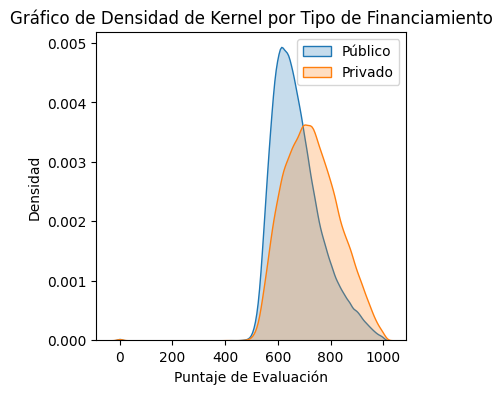

In [52]:
#Gráfico de densidades de kernel para lo colegios de tipo Público y Privado
plt.figure(figsize=(4, 4))
sns.kdeplot(df_escolares[df_escolares['tipo_finan'] == 'Público']['pes'], fill=True, label='Público')

# Crear un gráfico de densidad de kernel para colegios privados
sns.kdeplot(df_escolares[df_escolares['tipo_finan'] == 'Privado']['pes'], fill=True, label='Privado')

# Añadir etiquetas y título
plt.xlabel('Puntaje de Evaluación')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Kernel por Tipo de Financiamiento') 

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

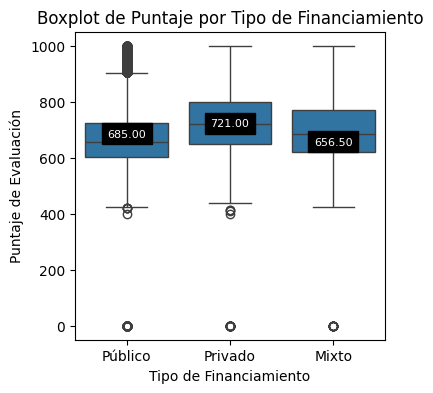

In [62]:
# Boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(x='tipo_finan', y='pes', data=df_escolares)

# Calcular las medianas
medianas = df_escolares.groupby('tipo_finan')['pes'].median().values

# Agregar anotaciones de las medianas
for i, median in enumerate(medianas):
    plt.text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=8, color='white', bbox=dict(facecolor='black'))

# Añadir etiquetas y título
plt.title('Boxplot de Puntaje por Tipo de Financiamiento')
plt.xlabel('Tipo de Financiamiento')
plt.ylabel('Puntaje de Evaluación')

# Mostrar el gráfico
plt.show()

- En el gráfico se puede observar lo obtenido con el análisis de diferencia de medias 

In [58]:
#Agrupacion por quintil y nota de evaluacion
df_notas = df_escolares.groupby(['quintil','pes'])['amie'].count().reset_index()
df_notas

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_2904\4288410814.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_notas = df_escolares.groupby(['quintil','pes'])['amie'].count().reset_index()


,quintil,pes,amie
0,1,0,22
1,1,400,1
2,1,409,1
3,1,412,0
4,1,421,2
...,...,...,...
1165,999999,988,0
1166,999999,991,0
1167,999999,994,0
1168,999999,997,0


In [5]:
df_notas['nota_inev'] = df_notas['pes']/100
df_notas

,quintil,pes,codigo,nota_inev
0,1,400,1,4.00
1,1,409,1,4.09
2,1,421,2,4.21
3,1,433,1,4.33
4,1,439,1,4.39
...,...,...,...,...
901,5,988,44,9.88
902,5,991,39,9.91
903,5,994,42,9.94
904,5,997,39,9.97


In [6]:
# Calcular el promedio de la nota y el número total de alumnos por quintil
df_agg = df_notas.groupby('quintil').agg({
    'nota_inev': 'mean',
    'codigo': 'sum'
}).reset_index()

In [7]:
df_agg

,quintil,nota_inev,codigo
0,1,7.188298,66985
1,2,7.278901,57853
2,3,7.370909,55170
3,4,7.289227,55268
4,5,7.318436,62084


In [8]:
import plotly.express as px

# Crear un gráfico de burbujas
fig = px.scatter(df_agg, x='quintil', y='nota_inev',
                 size='codigo', size_max=60,
                 text='codigo',  # Añadir el número de alumnos como texto en las burbujas
                 title='Gráfico de Burbujas: Quintil Socioeconómico vs Promedio de Nota de Evaluación',
                 labels={'nota_inev': 'Promedio de Nota Ser Bachiller',
                         'quintil': 'Quintil socioeconómico',
                         'codigo': 'Número de Alumnos'})

# Actualizar la apariencia de las etiquetas
fig.update_traces(textposition='middle center')

# Mostrar el gráfico
fig.show()

# Factores Asociados